# Job Data Analysis



In [36]:
import pandas as pd
%matplotlib inline

In [37]:
job_data = pd.read_csv("jobs-data.csv")
job_data.head()

,company_link,company_name,job_link,job_location,job_summary,job_title
0,NaN,TechStratium Inc.,http://www.indeed.com/company/TechStratium-Inc...,"Baltimore, MD",Experience with data visualization of insights...,Data Scientist
1,http://www.indeed.com/cmp/Akamai-Technologies,Akamai,http://www.indeed.com/rc/clk?jk=af5d288afac40e...,"Santa Clara, CA","Masters or higher degree in applied math, stat...",Data Scientist..
2,http://www.indeed.com/cmp/SAS-Institute,SAS Institute,http://www.indeed.com/rc/clk?jk=ea7f95b2729e4d...,"Cary, NC","We work closely with deep learning scientists,...",Data Scientist - Speech-to-Text NLP
3,http://www.indeed.com/cmp/Blackrock-Inc.,BlackRock,http://www.indeed.com/rc/clk?jk=e4ae3d5a0b7c91...,"New York, NY 10001 (Chelsea area)",We are looking for a data scientist with advan...,People Analytics & Research Data Scientist
4,http://www.indeed.com/cmp/Mylan,Mylan,http://www.indeed.com/rc/clk?jk=a7a674d907efbd...,"Morgantown, WV",Support initiatives including programming in t...,"Intern, Statistical Programmer"


Now that the data is loaded, we can do analysis.

In [38]:
job_data.dtypes

company_link    object
company_name    object
job_link        object
job_location    object
job_summary     object
job_title       object
dtype: object

In [39]:
job_data.shape


(1497, 6)

In [40]:
job_data['job_title'].value_counts(ascending=False)

Data Scientist                                                        440
Data Engineer/Scientist                                               100
Research Analyst                                                       19
Machine Learning Engineer                                               9
Senior Data Scientist                                                   9
Data Engineer                                                           6
Research Scientist                                                      6
Statistical Analyst                                                     5
Senior Software Engineer                                                4
Senior Research Analyst                                                 4
Scientist II – Global and Quantitative Proteomics                       3
Statistician                                                            3
Senior Associate Scientist                                              3
Data Analyst                          

In [41]:
job_data['company_name'].value_counts(ascending=False)

Walmart eCommerce                                        104
Novetta                                                  101
Syntelli Solutions, Inc                                  100
Indeed                                                   100
RS Energy Group                                           99
IBM                                                       34
Amgen                                                     18
Amazon Corporate LLC                                      15
P&G                                                       11
Ball Aerospace                                            10
Weill Cornell Medical College                              9
The Aerospace Corporation                                  9
Merck                                                      8
ICF                                                        8
BOEING                                                     8
Ochsner Health System                                      7
General Electric        

In [42]:
job_data['job_location'].value_counts(ascending=False)

Austin, TX 78731                                     102
Plymouth Meeting, PA                                 101
San Bruno, CA 94066                                  101
Charlotte, NC 28277                                  100
Crystal City, VA                                     100
New York, NY                                          51
Seattle, WA                                           26
United States                                         21
San Francisco, CA                                     21
Chicago, IL                                           17
Cambridge, MA                                         17
Atlanta, GA                                           17
Cambridge, MA 02142 (East Cambridge area)             16
Boston, MA                                            14
Cincinnati, OH                                        13
Washington, DC                                        13
Los Angeles, CA                                       12
San Diego, CA                  

In [43]:
job_data['state'] = job_data['job_location'].str.extract(', (\w{2})', expand=False)
job_data.head()

,company_link,company_name,job_link,job_location,job_summary,job_title,state
0,NaN,TechStratium Inc.,http://www.indeed.com/company/TechStratium-Inc...,"Baltimore, MD",Experience with data visualization of insights...,Data Scientist,MD
1,http://www.indeed.com/cmp/Akamai-Technologies,Akamai,http://www.indeed.com/rc/clk?jk=af5d288afac40e...,"Santa Clara, CA","Masters or higher degree in applied math, stat...",Data Scientist..,CA
2,http://www.indeed.com/cmp/SAS-Institute,SAS Institute,http://www.indeed.com/rc/clk?jk=ea7f95b2729e4d...,"Cary, NC","We work closely with deep learning scientists,...",Data Scientist - Speech-to-Text NLP,NC
3,http://www.indeed.com/cmp/Blackrock-Inc.,BlackRock,http://www.indeed.com/rc/clk?jk=e4ae3d5a0b7c91...,"New York, NY 10001 (Chelsea area)",We are looking for a data scientist with advan...,People Analytics & Research Data Scientist,NY
4,http://www.indeed.com/cmp/Mylan,Mylan,http://www.indeed.com/rc/clk?jk=a7a674d907efbd...,"Morgantown, WV",Support initiatives including programming in t...,"Intern, Statistical Programmer",WV


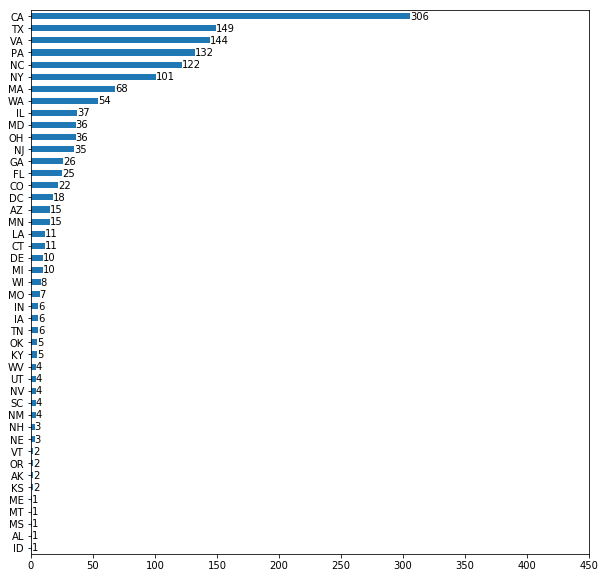

In [44]:
ax = job_data['state'].value_counts(ascending=True).plot(kind="barh", figsize=(10,10), xlim=(0,450))
# add counts as annotations
# http://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
for p in ax.patches:
    ax.annotate("%d" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, 0), textcoords='offset points')

In [45]:
job_data[job_data['job_location'].str.contains("Pittsburgh")]

,company_link,company_name,job_link,job_location,job_summary,job_title,state
67,http://www.indeed.com/cmp/University-of-Pittsb...,The University of Pittsburgh,http://www.indeed.com/rc/clk?jk=a2864d8177a792...,"Pittsburgh, PA",The CCR is comprised of a diverse team of Clin...,Research Technician,PA
255,NaN,kWantera,http://www.indeed.com/rc/clk?jk=7568b804290e9c...,"Pittsburgh, PA 15222 (Strip District area)",Past experience collaborating with data scient...,Data Engineer,PA
638,http://www.indeed.com/cmp/Pnc-Bank,PNC Bank,http://www.indeed.com/rc/clk?jk=9762b3594410c0...,"Pittsburgh, PA",The preferred candidate will have experience w...,Quantitative Analytics & Model Development Ana...,PA
1464,NaN,DBD Staffing,http://www.indeed.com/company/DBD-Staffing/job...,"Pittsburgh, PA",Manage data analysis support for segment targe...,Statistical Marketing Analyst,PA


## Analyzing Company Information

In [46]:
company_data = pd.read_csv("company-data.csv")
company_data.head()

,compensation_benefits_rating,culture_rating,js_advancement_rating,management_rating,overall_rating,url,wl_balanace_rating
0,3.9,3.5,3.3,3.4,3.9,http://www.indeed.com/cmp/Population-Council,3.8
1,3.6,3.8,3.2,3.9,4.0,"http://www.indeed.com/cmp/Ensco,-Inc.",4.1
2,3.9,3.6,3.3,3.4,3.8,http://www.indeed.com/cmp/General-Dynamics-Inf...,3.7
3,3.2,3.8,2.9,3.4,3.5,http://www.indeed.com/cmp/Mintel,3.7
4,3.8,3.8,3.6,3.5,4.0,http://www.indeed.com/cmp/ADP,3.8


In [47]:
company_data.dtypes

compensation_benefits_rating    float64
culture_rating                  float64
js_advancement_rating           float64
management_rating               float64
overall_rating                  float64
url                              object
wl_balanace_rating              float64
dtype: object

In [48]:
company_data.shape

(399, 7)

In [49]:
company_data.describe()

,compensation_benefits_rating,culture_rating,js_advancement_rating,management_rating,overall_rating,wl_balanace_rating
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,3.701504,3.680201,3.342607,3.421805,3.883208,3.782206
std,0.480941,0.486898,0.510532,0.502807,0.438297,0.488315
min,2.000000,1.600000,1.500000,1.500000,1.700000,1.000000
25%,3.400000,3.400000,3.100000,3.200000,3.700000,3.550000
50%,3.800000,3.700000,3.400000,3.400000,4.000000,3.800000
75%,4.000000,4.000000,3.600000,3.700000,4.200000,4.100000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


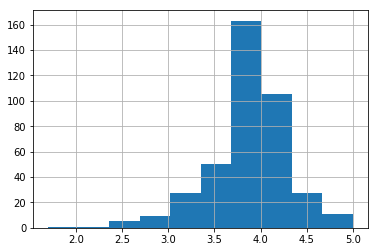

In [50]:
company_data['overall_rating'].hist()

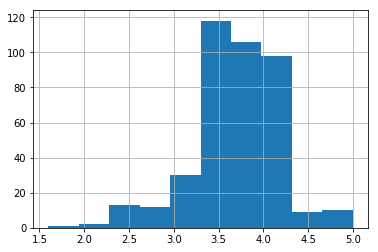

In [51]:
company_data['culture_rating'].hist()

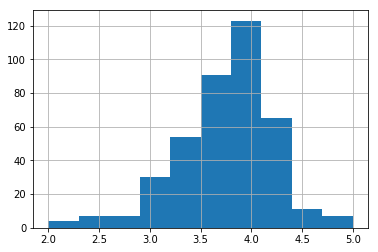

In [52]:
company_data['compensation_benefits_rating'].hist()

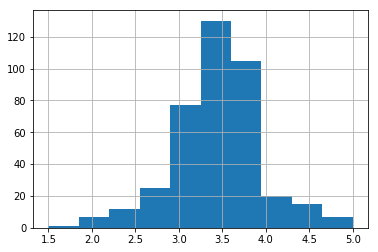

In [53]:
company_data['management_rating'].hist()

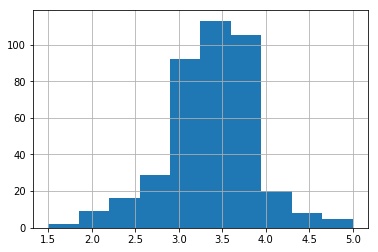

In [54]:
company_data['js_advancement_rating'].hist()